In [1]:
file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"


files = open(file_path, "r") 


In [3]:
import csv
import openpyxl
from openpyxl.styles import Font
from multiprocessing import Pool

# Define the column names and their corresponding formats
column_formats = {
    "medallion": (str, 32),
    "hack_license": (str, 32),
    "vendor_id": (str, 3),
    "rate_code": (int, (1, 2)),
    "store_and_fwd_flag": (str, 1),
    "pickup_datetime": (str, 19),
    "dropoff_datetime": (str, 19),
    "passenger_count": (int, (1, 2)),
    "trip_time_in_secs": (int, None),
    "trip_distance": (float, None),
    "pickup_longitude": (float, (-180, 180)),
    "pickup_latitude": (float, (-90, 90)),
    "dropoff_longitude": (float, (-180, 180)),
    "dropoff_latitude": (float, (-90, 90)),
}

# Function to validate a cell
def validate_cell(cell_value, col_format):
    if col_format[0] == str:
        if len(cell_value) != col_format[1]:
            return False
    elif col_format[0] == int:
        try:
            int_value = int(cell_value)
            if col_format[1] is not None and not col_format[1][0] <= int_value <= col_format[1][1]:
                return False
        except ValueError:
            return False
    elif col_format[0] == float:
        try:
            float_value = float(cell_value)
            if col_format[1] is not None and not col_format[1][0] <= float_value <= col_format[1][1]:
                return False
        except ValueError:
            return False
    return True

# Function to process a row
def process_row(row):
    is_valid = True
    for col_idx, (col_name, col_format) in enumerate(column_formats.items(), 1):
        cell_value = row[col_idx - 1]
        if not validate_cell(cell_value, col_format):
            is_valid = False
            break
    return is_valid, row

def main():
    with open("C:/Users/kadaliu/Downloads/trip/trip_data_3.csv", "r") as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)  # Skip the header row

        batch_size = 1000  # Adjust the batch size as needed
        pool = Pool(processes=4)  # Adjust the number of processes as needed

        wb = openpyxl.Workbook()
        ws = wb.active
        ws.title = "Validation Results"

        for col_idx, col_name in enumerate(column_formats.keys(), 1):
            cell = ws.cell(row=1, column=col_idx, value=col_name)
            cell.font = Font(bold=True)

        row_number = 2  # Start from row 2 in the Excel sheet
        batch = []
        for row in csvreader:
            batch.append(row)
            if len(batch) == batch_size:
                results = pool.map(process_row, batch)
                for result in results:
                    is_valid, row = result
                    if not is_valid:
                        for col_idx, cell_value in enumerate(row, 1):
                            cell = ws.cell(row=row_number, column=col_idx, value=cell_value)
                            cell.font = Font(color="FF0000")  # Red font for invalid value
                    row_number += 1
                batch = []

        # Process the remaining rows in the last batch
        results = pool.map(process_row, batch)
        for result in results:
            is_valid, row = result
            if not is_valid:
                for col_idx, cell_value in enumerate(row, 1):
                    cell = ws.cell(row=row_number, column=col_idx, value=cell_value)
                    cell.font = Font(color="FF0000")  # Red font for invalid value
                row_number += 1

    wb.save("ValidationResults.xlsx")

if name == 'main':
    main()

NameError: name 'name' is not defined

In [2]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 262.6 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 512.0 kB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 1.4 MB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 959.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\kadaliu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
n = 0
for line in files:
    print("colomn name :", line)
    columns = list[line]
    n+=1
    if n>0:
        break

colomn name : medallion, hack_license, vendor_id, rate_code, store_and_fwd_flag, pickup_datetime, dropoff_datetime, passenger_count, trip_time_in_secs, trip_distance, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude



In [3]:
n = 0
for line in files:
    n+=1
n

15749228

In [4]:
columns

list['medallion, hack_license, vendor_id, rate_code, store_and_fwd_flag, pickup_datetime, dropoff_datetime, passenger_count, trip_time_in_secs, trip_distance, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude\n']

In [15]:
import csv
from datetime import datetime

file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"


with open(file_path, 'r', newline='') as file:
    reader = csv.reader(file)
    header = next(reader)

    datetime_column_index = None
    for i, column in enumerate(header):
        if column.strip() == 'dropoff_datetime':
            datetime_column_index = i
            break

    if datetime_column_index is None:
        print("The 'dropoff_datetime' column was not found.")
    else:
        min_date = None
        max_date = None
        total_rows = 0

        for row in reader:
            total_rows += 1
            datetime_str = row[datetime_column_index]
            datetime_value = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")

            if min_date is None or datetime_value < min_date:
                min_date = datetime_value
            if max_date is None or datetime_value > max_date:
                max_date = datetime_value

        print("Datetime Range:", min_date, "to", max_date)
        print("Total Rows:", total_rows)


KeyboardInterrupt: 

In [24]:
import csv

file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"

with open(file_path, "r", newline="") as csvfile:
    csvreader = csv.reader(csvfile)
    
    # Read the header row to get column names
    header = next(csvreader)
    
    # Print column names and descriptions
    for column_name in header:
        print("Column name:", column_name)
    
    # Provide descriptions for each field (manually or from documentation)
    # For example:
    descriptions = {
        "Field1": "Description of Field1",
        "Field2": "Description of Field2",
        # Add descriptions for other fields as needed
    }
    
    # You can access descriptions like this:
    for column_name in header:
        print(f"{column_name} - {descriptions.get(column_name, f'this field is about {column_name}')}")





Column name: medallion
Column name:  hack_license
Column name:  vendor_id
Column name:  rate_code
Column name:  store_and_fwd_flag
Column name:  pickup_datetime
Column name:  dropoff_datetime
Column name:  passenger_count
Column name:  trip_time_in_secs
Column name:  trip_distance
Column name:  pickup_longitude
Column name:  pickup_latitude
Column name:  dropoff_longitude
Column name:  dropoff_latitude
medallion - this field is about medallion
 hack_license - this field is about  hack_license
 vendor_id - this field is about  vendor_id
 rate_code - this field is about  rate_code
 store_and_fwd_flag - this field is about  store_and_fwd_flag
 pickup_datetime - this field is about  pickup_datetime
 dropoff_datetime - this field is about  dropoff_datetime
 passenger_count - this field is about  passenger_count
 trip_time_in_secs - this field is about  trip_time_in_secs
 trip_distance - this field is about  trip_distance
 pickup_longitude - this field is about  pickup_longitude
 pickup_lati

In [25]:
import csv

file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"

# Open the input file
with open(file_path, 'r', newline='') as input_file:
    reader = csv.reader(input_file)

    # Read and print the header
    header = next(reader)
    print(header)

    # Read and print the first 10 rows
    for i, row in enumerate(reader):
        if i < 10:
            print(row)
        else:
            break

print("sample data have been printed.")



['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude']
['FE7B354FEB67B9C94BD34EA54469691C', '2C78614ADC9C602EC70D65CCB4E63B14', 'CMT', '1', 'N', '2013-03-01 00:00:04', '2013-03-01 00:19:03', '1', '1138', '14.30', '-73.776703', '40.645164', '-73.913925', '40.772614']
['B1370E6501ED61CEDA0160199AF7708C', '08BF18740B38D64720C9E060429A3968', 'CMT', '1', 'N', '2013-03-01 00:00:18', '2013-03-01 00:12:11', '1', '712', '3.30', '-73.987343', '40.752056', '-73.96534', '40.792721']
['CBC20164C22B96CAF5BC86C49F749DBB', 'F3310C8DA3DB753DDB5800F32D3CB8E3', 'CMT', '1', 'N', '2013-03-01 00:00:18', '2013-03-01 00:14:24', '1', '845', '4.50', '-73.991493', '40.726444', '-73.980865', '40.77837']
['B8256802A449BEF34E161654BFA8A2B6', 'DF142C5256392C3CDA67C7DFFA5B88E2', 'CMT', '1', 'N', '2013-03-01 0

In [26]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [16]:
import csv
import folium


min_pickup_latitude = float("inf")
max_pickup_latitude = float("-inf")
min_pickup_longitude = float("inf")
max_pickup_longitude = float("-inf")

min_dropoff_latitude = float("inf")
max_dropoff_latitude = float("-inf")
min_dropoff_longitude = float("inf")
max_dropoff_longitude = float("-inf")


nyc_latitude_min = 40.4774
nyc_latitude_max = 45.01585
nyc_longitude_min = -74.2591
nyc_longitude_max = -73.7004


file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"


with open(file_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile)


    for row in csvreader:
        try:

            pickup_latitude = float(row[11]) 
            pickup_longitude = float(row[10])
            dropoff_latitude = float(row[13])  
            dropoff_longitude = float(row[12]) 

           
            if (
                nyc_latitude_min <= pickup_latitude <= nyc_latitude_max
                and nyc_longitude_min <= pickup_longitude <= nyc_longitude_max
            ):
                min_pickup_latitude = min(min_pickup_latitude, pickup_latitude)
                max_pickup_latitude = max(max_pickup_latitude, pickup_latitude)
                min_pickup_longitude = min(min_pickup_longitude, pickup_longitude)
                max_pickup_longitude = max(max_pickup_longitude, pickup_longitude)

            if (
                nyc_latitude_min <= dropoff_latitude <= nyc_latitude_max
                and nyc_longitude_min <= dropoff_longitude <= nyc_longitude_max
            ):
                min_dropoff_latitude = min(min_dropoff_latitude, dropoff_latitude)
                max_dropoff_latitude = max(max_dropoff_latitude, dropoff_latitude)
                min_dropoff_longitude = min(min_dropoff_longitude, dropoff_longitude)
                max_dropoff_longitude = max(max_dropoff_longitude, dropoff_longitude)
        except ValueError:
            continue


print(f"Min and Max Pickup Latitude: {min_pickup_latitude}, {max_pickup_latitude}")
print(f"Min and Max Pickup Longitude: {min_pickup_longitude}, {max_pickup_longitude}")
print(f"Min and Max Drop-off Latitude: {min_dropoff_latitude}, {max_dropoff_latitude}")
print(f"Min and Max Drop-off Longitude: {min_dropoff_longitude}, {max_dropoff_longitude}")


m = folium.Map(location=[(min_pickup_latitude + max_pickup_latitude) / 2, (min_pickup_longitude + max_pickup_longitude) / 2], zoom_start=10)


folium.Marker([min_pickup_latitude, min_pickup_longitude], icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([max_pickup_latitude, max_pickup_longitude], icon=folium.Icon(color='blue')).add_to(m)
folium.Marker([min_dropoff_latitude, min_dropoff_longitude], icon=folium.Icon(color='red')).add_to(m)
folium.Marker([max_dropoff_latitude, max_dropoff_longitude], icon=folium.Icon(color='red')).add_to(m)


m.save("map.html")
m

KeyboardInterrupt: 

In [ ]:
medallion - VARCHAR(64)
hack_license - VARCHAR(64)
vendor_id - CHAR(3) 
rate_code - TINYINT
store_and_fwd_flag - CHAR(1)
pickup_datetime - DATETIME 
dropoff_datetime - DATETIME
passenger_count - TINYINT
trip_time_in_secs - INT
trip_distance - DECIMAL(6,2) 
tpickup_longitude - DECIMAL(9,6) 
tpickup_latitude - DECIMAL(8,6)
tdropoff_longitude - DECIMAL(9,6) 
tdropoff_latitude - DECIMAL(8,6)

In [23]:
pip install shapely

  Obtaining dependency information for shapely from https://files.pythonhosted.org/packages/9e/39/029c441d8af32ab423b229c4525ce5ce6707318155b59634811a4c56f5c4/shapely-2.0.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 653.6 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 787.7 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 751.6 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 751.6 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 612.6 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 765.3 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/

In [24]:
pip install geopandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/27/27/2687abaa2ac02b5814e2929a5033da1e5d132c19a904dc56f77f63fd6eb9/geopandas-0.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.1 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.1 kB 325.1 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.1 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 371.6 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64

In [25]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


Average Trip Distance: 3.294180055192745 kilometers


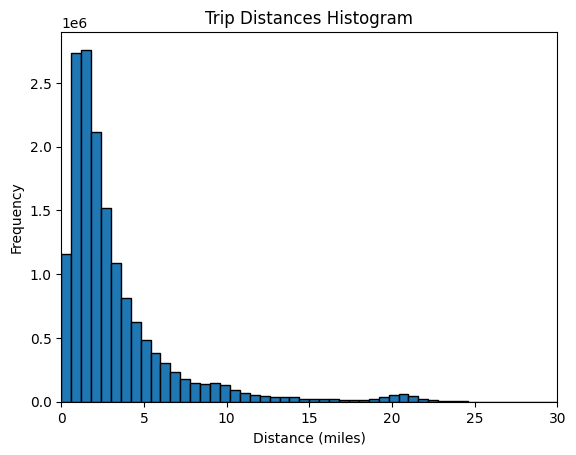

In [28]:
import csv
import math
import matplotlib.pyplot as plt

# Function to calculate Haversine Distance between two coordinates
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    radius = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c

    return distance

# List to store trip distances
trip_distances = []

# Path to your CSV file
file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"

# Open the CSV file and calculate trip distances
with open(file_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # Skip the header row

    for row in csvreader:
        try:
            # Assuming the latitude and longitude columns are at specific indices
            pickup_latitude = float(row[11])  # Replace with the correct index
            pickup_longitude = float(row[10])
            dropoff_latitude = float(row[13])  # Replace with the correct index
            dropoff_longitude = float(row[12])  # Replace with the correct index

            # Calculate the Haversine Distance for the trip
            distance = haversine_distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)
            
            # Limit distance to 300 miles
            if distance <= 500:
                trip_distances.append(distance)
        except ValueError:
            continue

# Calculate the average trip distance
average_distance = sum(trip_distances) / len(trip_distances)

# Print the average trip distance
print(f"Average Trip Distance: {average_distance} kilometers")

# Create a histogram of trip distances
plt.hist(trip_distances, bins=50, edgecolor='black', range=(0, 30))
plt.title("Trip Distances Histogram")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.xlim(0, 30)  # Set the x-axis limit to 300 miles
plt.show()



In [10]:
import csv

# Path to your CSV file
file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"

# Define the indices of the numeric columns you want to analyze
numeric_column_indices = [7, 8, 9]  # Replace with the indices of your numeric columns

# Create dictionaries to store min and max values for each numeric field
min_values = {}
max_values = {}

# Initialize the dictionaries with large and small values
for index in numeric_column_indices:
    min_values[index] = float("inf")
    max_values[index] = float("-inf")

# Open the CSV file and find min and max values for each numeric field
with open(file_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # Skip the header row

    for row in csvreader:
        for index in numeric_column_indices:
            value = float(row[index])
            if value < min_values[index]:
                min_values[index] = value
            if value > max_values[index]:
                max_values[index] = value

# Print the min and max values for each numeric field
for index in numeric_column_indices:
    column_name = header[index]
    print(f"Min and Max values for {column_name}:")
    print(f"Min: {min_values[index]}")
    print(f"Max: {max_values[index]}\n")


Min and Max values for  passenger_count:
Min: 0.0
Max: 255.0

Min and Max values for  trip_time_in_secs:
Min: 0.0
Max: 10800.0

Min and Max values for  trip_distance:
Min: 0.0
Max: 100.0



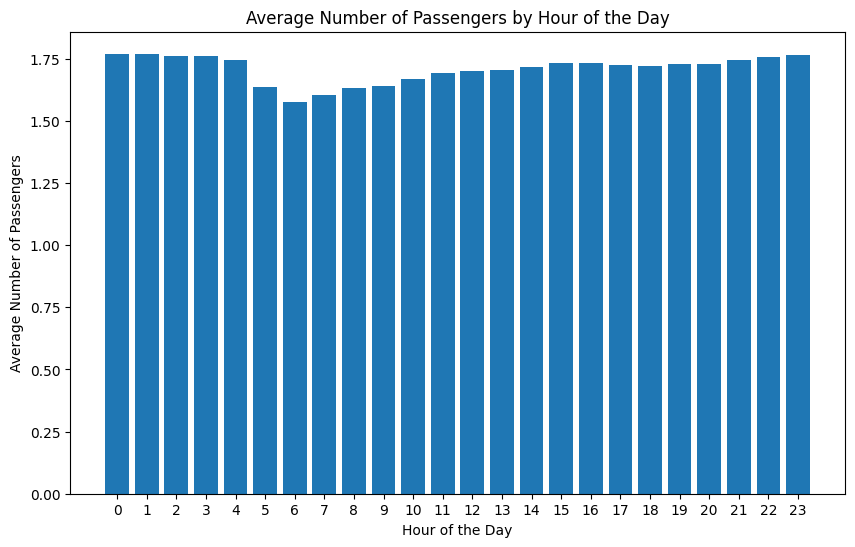

In [29]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# Path to your CSV file
file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"

# Initialize a dictionary to store the total number of passengers for each hour
passenger_count_by_hour = {hour: 0 for hour in range(24)}
hourly_trip_counts = {hour: 0 for hour in range(24)}

# Open the CSV file and process the data
with open(file_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # Skip the header row

    for row in csvreader:
        try:
            # Assuming the pickup datetime column is at a specific index (adjust as needed)
            pickup_datetime_str = row[5]  # Replace with the correct index
            passenger_count = int(row[7])  # Replace with the correct index

            # Convert the pickup datetime string to a datetime object
            pickup_datetime = datetime.strptime(pickup_datetime_str, "%Y-%m-%d %H:%M:%S")

            # Extract the hour from the pickup datetime
            hour = pickup_datetime.hour

            # Update the passenger count and trip count for the corresponding hour
            passenger_count_by_hour[hour] += passenger_count
            hourly_trip_counts[hour] += 1
        except (ValueError, IndexError):
            continue

# Calculate the average number of passengers for each hour
average_passengers_by_hour = {hour: passenger_count_by_hour[hour] / hourly_trip_counts[hour] if hourly_trip_counts[hour] != 0 else 0 for hour in range(24)}

# Create a chart
plt.figure(figsize=(10, 6))
plt.bar(range(24), [average_passengers_by_hour[hour] for hour in range(24)])
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Passengers")
plt.title("Average Number of Passengers by Hour of the Day")
plt.xticks(range(24))
plt.show()



In [30]:
import csv

# Paths for the original and new CSV files
original_file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"
new_file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3_sampled.csv"

# Define the sampling rate (1 out of every thousand rows)
sampling_rate = 1000

# Open the original CSV file for reading and the new CSV file for writing
with open(original_file_path, 'r', newline='') as input_file, open(new_file_path, 'w', newline='') as output_file:
    csvreader = csv.reader(input_file)
    csvwriter = csv.writer(output_file)

    # Copy the header row from the original file to the new file
    header = next(csvreader)
    csvwriter.writerow(header)

    # Loop through the rows in the original file and write every "sampling_rate"-th row to the new file
    row_number = 0
    for row in csvreader:
        if row_number % sampling_rate == 0:
            csvwriter.writerow(row)
        row_number += 1

print(f"New CSV file with 1 out of every {sampling_rate} rows has been created: {new_file_path}")


New CSV file with 1 out of every 1000 rows has been created: C:/Users/kadaliu/Downloads/trip/trip_data_3_sampled.csv


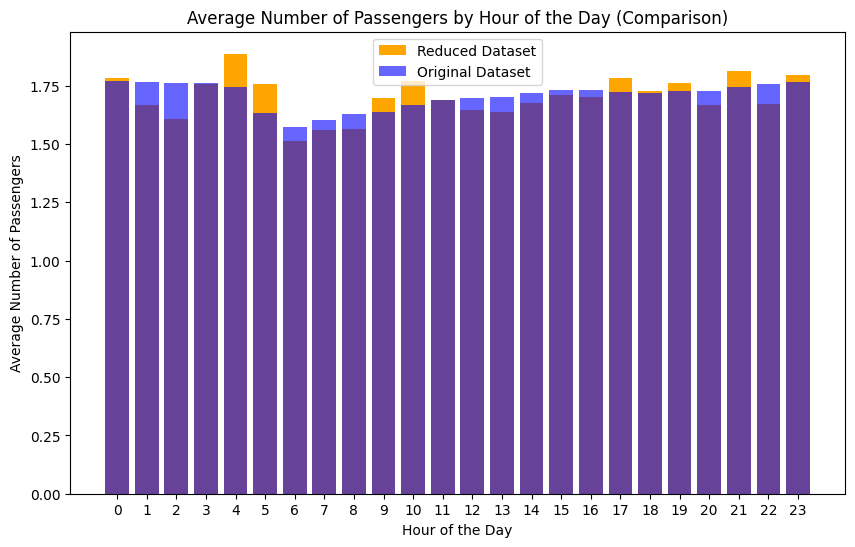

In [31]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# Path to the reduced CSV file created in the previous step
reduced_file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3_sampled.csv"

# Initialize a dictionary to store the total number of passengers for each hour
passenger_count_by_hour = {hour: 0 for hour in range(24)}
hourly_trip_counts = {hour: 0 for hour in range(24)}

# Open the reduced CSV file and process the data
with open(reduced_file_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # Skip the header row

    for row in csvreader:
        try:
            # Assuming the pickup datetime column is at a specific index (adjust as needed)
            pickup_datetime_str = row[5]  # Replace with the correct index
            passenger_count = int(row[7])  # Replace with the correct index

            # Convert the pickup datetime string to a datetime object
            pickup_datetime = datetime.strptime(pickup_datetime_str, "%Y-%m-%d %H:%M:%S")

            # Extract the hour from the pickup datetime
            hour = pickup_datetime.hour

            # Update the passenger count and trip count for the corresponding hour
            passenger_count_by_hour[hour] += passenger_count
            hourly_trip_counts[hour] += 1
        except (ValueError, IndexError):
            continue

# Calculate the average number of passengers for each hour
average_passengers_by_hour_reduced = {hour: passenger_count_by_hour[hour] / hourly_trip_counts[hour] if hourly_trip_counts[hour] != 0 else 0 for hour in range(24)}

# Create a chart for the reduced dataset
plt.figure(figsize=(10, 6))
plt.bar(range(24), [average_passengers_by_hour_reduced[hour] for hour in range(24)], color='orange', label='Reduced Dataset')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Passengers")
plt.title("Average Number of Passengers by Hour of the Day (Reduced Dataset)")

# Load the original dataset to compare
original_file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"
with open(original_file_path, 'r', newline='') as original_file:
    csvreader = csv.reader(original_file)
    header = next(csvreader)  # Skip the header row
    num_rows = sum(1 for row in csvreader)  # Count the total number of rows

# Create a chart for the original dataset
plt.bar(range(24), [average_passengers_by_hour[hour] for hour in range(24)], color='blue', label='Original Dataset', alpha=0.6)

plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Passengers")
plt.title("Average Number of Passengers by Hour of the Day (Comparison)")
plt.legend()

plt.xticks(range(24))
plt.show()


In [63]:
import csv
from collections import Counter


file_path = "C:/Users/kadaliu/Downloads/trip/trip_data_3.csv"

column_indices = [7, 8, 9]  

column_counters = {index: Counter() for index in column_indices}


q

Distinct valid values for  passenger_count (Column 7):
Distinct: 6 (3x of avg)
Distinct: 9 (3x of avg)
Distinct: 7 (3x of avg)
Distinct: 255 (3x of avg)
Distinct valid values for  trip_time_in_secs (Column 8):
Distinct: 6 (3x of avg)
Distinct: 9 (3x of avg)
Distinct: 10 (3x of avg)
Distinct: 7 (3x of avg)
Distinct: 8 (3x of avg)
Distinct: 5 (3x of avg)
Distinct valid values for  trip_distance (Column 9):
Distinct: 14.30 (3x of avg)
Distinct: 9.00 (3x of avg)
Distinct: 22.00 (3x of avg)
Distinct: 20.00 (3x of avg)
Distinct: 9.40 (3x of avg)
Distinct: 18.10 (3x of avg)
Distinct: 21.90 (3x of avg)
Distinct: 17.20 (3x of avg)
Distinct: 12.00 (3x of avg)
Distinct: 10.20 (3x of avg)
Distinct: 20.10 (3x of avg)
Distinct: 8.70 (3x of avg)
Distinct: 11.80 (3x of avg)
Distinct: 10.30 (3x of avg)
Distinct: 10.50 (3x of avg)
Distinct: 19.80 (3x of avg)
Distinct: 9.90 (3x of avg)
Distinct: 10.10 (3x of avg)
Distinct: 10.66 (3x of avg)
Distinct: 9.50 (3x of avg)
Distinct: 8.91 (3x of avg)
Distinct: 

In [64]:
avg_pass_coun = sum(pass_coun)//len(pass_coun)
print(f"distint values are : {[pass_disn for pass_disn in pass_coun if pass_disn > avg_pass_coun*4]}")

distint values are : [255.0]
